# Pandas Review

In [2]:
import numpy as np
import pandas as pd

## 1. Create new columns from existing columns in Pandas

In [2]:
# Create example data
df = pd.DataFrame({
  "A": [420, 380, 390],
  "B": [50, 40, 45]
})

df["C"] = df["A"] * df["B"]
df

,A,B,C
0,420,50,21000
1,380,40,15200
2,390,45,17550


## 2. Create new column with series.apply()

In [4]:
df['D'] = df['C'].apply(lambda x: x>=16000)
df

,A,B,C,D
0,420,50,21000,True
1,380,40,15200,False
2,390,45,17550,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
 3   D       3 non-null      bool 
dtypes: bool(1), int64(3)
memory usage: 203.0 bytes


## 3. Change Boolean dtype to integer category dtype 

In [8]:
df['D'] = df['D'].astype(int).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A       3 non-null      int64   
 1   B       3 non-null      int64   
 2   C       3 non-null      int64   
 3   D       3 non-null      category
dtypes: category(1), int64(3)
memory usage: 327.0 bytes


In [9]:
df

,A,B,C,D
0,420,50,21000,1
1,380,40,15200,0
2,390,45,17550,1


## 4. Get the names of columns and index of a DF

In [22]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [13]:
df.index.values

array([0, 1, 2])

In [18]:
sorted(df.columns, reverse=True)

['D', 'C', 'B', 'A']

## 5. iloc() and loc()
<pre>DataFrame.iloc is a method used to retrieve data from a Data frame, and it is an integer position-based locator (from 0 to length-1 of the axis)
DataFrame.loc gets rows (and/or columns) with particular labels.
</pre>

In [23]:
df

,A,B,C,D
0,420,50,21000,1
1,380,40,15200,0
2,390,45,17550,1


In [30]:
df.iloc[[0]] # 0 row DF

,A,B,C,D
0,420,50,21000,1


In [28]:
df.iloc[0]  # 0 row series

A      420
B       50
C    21000
D        1
Name: 0, dtype: int64

In [35]:
df.iloc[:, 2] # col index 2 series

0    21000
1    15200
2    17550
Name: C, dtype: int64

In [37]:
df.iloc[:2, :3] # first 2 rows and first 3 cols

,A,B,C
0,420,50,21000
1,380,40,15200


In [40]:
df[['A']]  # same as df.iloc[[0]]

,A
0,420
1,380
2,390


In [41]:
df['A'] # same as df.iloc[0]

0    420
1    380
2    390
Name: A, dtype: int64

## 6. Sort DataFrame

In [47]:
df

,A,B,C,D
0,420,50,21000,1
1,380,40,15200,0
2,390,45,17550,1


In [48]:
df.sort_values(by='A', ascending=False)

,A,B,C,D
0,420,50,21000,1
2,390,45,17550,1
1,380,40,15200,0


In [50]:
df.sort_values(by=['A','D'], ascending=[True,False])

,A,B,C,D
1,380,40,15200,0
2,390,45,17550,1
0,420,50,21000,1


## 7. Series.idxmax(), Series.max(), Series.idxmin(), Series.min()

In [51]:
df['A'].idxmax() # Return the index of max value in Series

0

In [53]:
df['A'].max()    # Return the max value in Series

420

In [54]:
df['A'].idxmin() # Return the index of min value in Series

1

In [55]:
df['A'].min()    # Return the min value in Series

380

## 8. Select series/df by dtype

In [56]:
df.select_dtypes(include=['int'])

,A,B,C
0,420,50,21000
1,380,40,15200
2,390,45,17550


In [57]:
df.select_dtypes(include=['category'])

,D
0,1
1,0
2,1


In [59]:
# Integer column in list
df.select_dtypes(include=['int']).columns.tolist()

['A', 'B', 'C']

## 9. Groupby
<pre>A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.</pre>

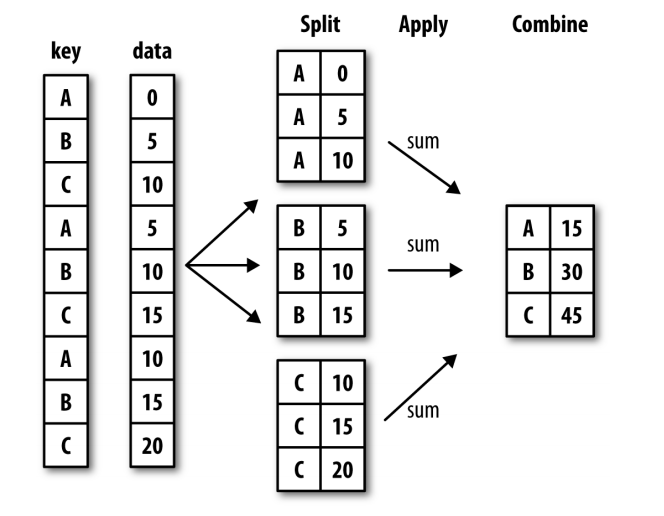

In [25]:
df1 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})

In [26]:
df1

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [27]:
df1.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [28]:
df1.groupby(['Animal'])

In [67]:
df1.groupby(['Animal']).agg(['mean','max','min'])

Max Speed              
            mean    max    min
Animal                        
Falcon     375.0  380.0  370.0
Parrot      25.0   26.0   24.0

## 10. Split a string column into two columns

In [52]:
df2 = pd.DataFrame({'row': ['00010 Tsim Sha Tsui', 
                           '00020 Yau Ma Tei',
                           '00030 Mong Kok']})
df2

,row
0,00010 Tsim Sha Tsui
1,00020 Yau Ma Tei
2,00030 Mong Kok


In [45]:
df2[['code','location']] = df2['row'].str.split(n=1, expand=True)
df2 

,row,code,location
0,00010 Tsim Sha Tsui,00010,Tsim Sha Tsui
1,00020 Yau Ma Tei,00020,Yau Ma Tei
2,00030 Mong Kok,00030,Mong Kok


In [46]:
df2 = df2[['code','location']]
df2

,code,location
0,00010,Tsim Sha Tsui
1,00020,Yau Ma Tei
2,00030,Mong Kok


## 11. Iterate over rows in Pandas DataFrame

In [79]:
for idx, row in df2.iterrows():
    print(idx, row['code'], row['location'])

0 00010 Tsim Sha Tsui
1 00020 Yau Ma Tei
2 00030 Mong Kok


## 12. Iterate over rows in Pandas DataFrame as namedtuples

In [80]:
for row in df2.itertuples():
    print(row)

Pandas(Index=0, code='00010', location='Tsim Sha Tsui')
Pandas(Index=1, code='00020', location='Yau Ma Tei')
Pandas(Index=2, code='00030', location='Mong Kok')


## 13. Rolling windows - mean

In [88]:
import yfinance as yf
hsi = yf.download("^HSI", start="2021-01-01", end="2023-01-01")
hsi = hsi.drop(['Open','High','Low','Close','Volume'], axis=1)
hsi.head(3)

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,27472.810547
2021-01-05,27649.859375
2021-01-06,27692.300781


In [89]:
hsi['MA50'] = hsi['Adj Close'].rolling(50).mean()
hsi.tail(3)

,Adj Close,MA50
Date,,
2022-12-28,19898.910156,17666.513184
2022-12-29,19741.140625,17723.044395
2022-12-30,19781.410156,17788.447012


## 14. Rolling windows - median

In [91]:
hsi['Med50'] = hsi['Adj Close'].rolling(50).median()
hsi.tail(3)

,Adj Close,MA50,MA10,Med50
Date,,,,
2022-12-28,19898.910156,17666.513184,19486.820117,17658.405273
2022-12-29,19741.140625,17723.044395,19501.314258,17826.719727
2022-12-30,19781.410156,17788.447012,19512.110352,18019.099609


In [94]:
hsi['STD50'] =hsi['Adj Close'].rolling(50).std()
hsi.tail(3)

,Adj Close,MA50,MA10,Med50,STD50
Date,,,,,
2022-12-28,19898.910156,17666.513184,19486.820117,17658.405273,1602.959207
2022-12-29,19741.140625,17723.044395,19501.314258,17826.719727,1625.581964
2022-12-30,19781.410156,17788.447012,19512.110352,18019.099609,1641.539467


## 15. Rolling windows - 25%Quantile, 75%Quantile

In [95]:
hsi['25PCQ'] = hsi['Adj Close'].rolling(50).quantile(0.25)
hsi['75PCQ'] = hsi['Adj Close'].rolling(50).quantile(0.75)
hsi.tail(3)

,Adj Close,MA50,MA10,Med50,STD50,25PCQ,75PCQ
Date,,,,,,,
2022-12-28,19898.910156,17666.513184,19486.820117,17658.405273,1602.959207,16299.794678,19304.730469
2022-12-29,19741.140625,17723.044395,19501.314258,17826.719727,1625.581964,16299.794678,19364.645020
2022-12-30,19781.410156,17788.447012,19512.110352,18019.099609,1641.539467,16299.794678,19423.032227


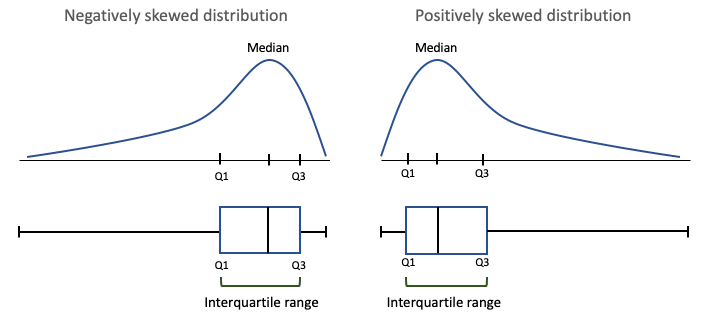

## 16. Rolling windows - Kurt, Skew
<pre>Pandas rolling.kurt() uses Fisher (~ND : Kurt = 0)
</pre>

In [100]:
hsi['250Kurt'] = hsi['Adj Close'].rolling(250).kurt()
hsi['250Skew'] = hsi['Adj Close'].rolling(250).skew()
hsi.tail(3)

,Adj Close,MA50,MA10,Med50,STD50,25PCQ,75PCQ,250Kurt,250Skew
Date,,,,,,,,,
2022-12-28,19898.910156,17666.513184,19486.820117,17658.405273,1602.959207,16299.794678,19304.730469,-0.342077,-0.145472
2022-12-29,19741.140625,17723.044395,19501.314258,17826.719727,1625.581964,16299.794678,19364.645020,-0.324858,-0.135617
2022-12-30,19781.410156,17788.447012,19512.110352,18019.099609,1641.539467,16299.794678,19423.032227,-0.306429,-0.126099


## 17. Rolling windows - Corr

In [106]:
tracker = yf.download("2800.hk", start="2021-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [112]:
hsi['Adj Close'].corr(tracker['Adj Close'])

0.9987842252527157

In [114]:
hsi['Adj Close'].rolling(250).corr(tracker['Adj Close']).tail(5)

Date
2022-12-22    0.996608
2022-12-23    0.996580
2022-12-28    0.996557
2022-12-29    0.996524
2022-12-30    0.996493
Name: Adj Close, dtype: float64

## 18. Rolling windows – Cov

In [116]:
hsi['Adj Close'].cov(tracker['Adj Close'])

16174.886107423314

In [117]:
hsi['Adj Close'].rolling(250).cov(tracker['Adj Close']).tail(5)

Date
2022-12-22    5397.138608
2022-12-23    5376.666596
2022-12-28    5351.532767
2022-12-29    5324.522278
2022-12-30    5295.814185
Name: Adj Close, dtype: float64

## 19. Autocorrelation

In [118]:
hsi['Adj Close'].autocorr(lag=1)

0.9957232681008235

In [119]:
hsi['Adj Close'].autocorr(lag=2)

0.991392258342818

In [122]:
tracker['Adj Close'].autocorr(lag=1)

0.9956809018380771

In [120]:
tracker['Adj Close'].autocorr(lag=2)

0.9912986260684893

## 20. Series.map()

In [179]:
hsi['Adj Close'][-3:].map(lambda x: 'Adj Close Price: '+str(x))

Date
2022-12-28    Adj Close Price: 19898.91015625
2022-12-29      Adj Close Price: 19741.140625
2022-12-30    Adj Close Price: 19781.41015625
Name: Adj Close, dtype: object

## 21. Series.apply() , DF.apply()

In [216]:
# Daily spread of tracker fund
tracker[['High','Low']].apply(lambda x: x[0]-x[1], axis=1)

Date
2021-01-04    0.360001
2021-01-05    0.539999
2021-01-06    0.360001
2021-01-07    0.299999
2021-01-08    0.400002
                ...   
2022-12-22    0.269999
2022-12-23    0.330000
2022-12-28    0.340000
2022-12-29    0.219999
2022-12-30    0.299999
Length: 493, dtype: float64

## 22. Transform self 

In [217]:
tracker_minmax = tracker['Adj Close'].max()-tracker['Adj Close'].min()
tracker_mean = tracker['Adj Close'].mean()

In [224]:
# Standardise Adj Close 
tracker['Adj Close'].transform(lambda x: (x-tracker_mean)/tracker_minmax)

Date
2021-01-04    0.219080
2021-01-05    0.225171
2021-01-06    0.231261
2021-01-07    0.222735
2021-01-08    0.242223
                ...   
2022-12-22   -0.258995
2022-12-23   -0.264476
2022-12-28   -0.243770
2022-12-29   -0.255341
2022-12-30   -0.251078
Name: Adj Close, Length: 493, dtype: float64

## 23. Merge DF on key

In [225]:
member = pd.read_csv('member.csv')
order = pd.read_csv('order.csv')

In [226]:
member

,MemberID,Name,Gender,Age,Address
0,101,Alvin,M,50,"No 2, Pok Fu Lam Road, HongKong"
1,102,Baron,M,25,"No 30, Nathan Road"
2,103,Christy,F,35,"No 5, Mody Road, Kowloon"
3,104,Doris,F,28,"No 9, Tat Chee Road"
4,105,Eddy,M,65,"No 6, Harbour Road, Kowloon"


In [227]:
order

,OrderID,OrderDate,MemberID,OrderAmount
0,218,20/1/2023,103,1860.5
1,302,22/1/2023,105,890.4
2,369,22/1/2023,101,560.9


In [231]:
order_full = order.merge(member, how='left', on='MemberID')
order_full

,OrderID,OrderDate,MemberID,OrderAmount,Name,Gender,Age,Address
0,218,20/1/2023,103,1860.5,Christy,F,35,"No 5, Mody Road, Kowloon"
1,302,22/1/2023,105,890.4,Eddy,M,65,"No 6, Harbour Road, Kowloon"
2,369,22/1/2023,101,560.9,Alvin,M,50,"No 2, Pok Fu Lam Road, HongKong"


## 24. Filter DF

In [237]:
order_full

,OrderID,OrderDate,MemberID,OrderAmount,Name,Gender,Age,Address
0,218,20/1/2023,103,1860.5,Christy,F,35,"No 5, Mody Road, Kowloon"
1,302,22/1/2023,105,890.4,Eddy,M,65,"No 6, Harbour Road, Kowloon"
2,369,22/1/2023,101,560.9,Alvin,M,50,"No 2, Pok Fu Lam Road, HongKong"


In [233]:
# Filter a column with condition
order_full['OrderAmount'][order_full['MemberID']==105]

1    890.4
Name: OrderAmount, dtype: float64

In [236]:
# Filter a column with condition in string column 
order_full[['Name','OrderDate','OrderAmount']][order_full["Address"].str.contains("HongKong")]

,Name,OrderDate,OrderAmount
2,Alvin,22/1/2023,560.9


## 25. Sum(), Count()

In [243]:
order_full

,OrderID,OrderDate,MemberID,OrderAmount,Name,Gender,Age,Address
0,218,20/1/2023,103,1860.5,Christy,F,35,"No 5, Mody Road, Kowloon"
1,302,22/1/2023,105,890.4,Eddy,M,65,"No 6, Harbour Road, Kowloon"
2,369,22/1/2023,101,560.9,Alvin,M,50,"No 2, Pok Fu Lam Road, HongKong"


In [241]:
order_full['OrderAmount'].sum()

3311.8

In [242]:
order_full['OrderAmount'].count()

3

## 26. Describe and information of DF

In [239]:
tracker.describe()

,Open,High,Low,Close,Adj Close,Volume
count,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,24.051014,24.242819,23.827809,24.042698,24.042698,1.672044e+08
std,4.024353,4.015476,4.019117,4.013888,4.013888,1.080651e+08
min,14.890000,15.200000,14.680000,14.820000,14.820000,0.000000e+00
25%,20.620001,20.799999,20.459999,20.700001,20.700001,1.042545e+08
50%,24.260000,24.420000,24.100000,24.219999,24.219999,1.376730e+08
75%,28.120001,28.280001,27.920000,28.120001,28.120001,1.968548e+08
max,31.299999,31.340000,30.719999,31.240000,31.240000,9.593655e+08


In [240]:
tracker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2021-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       493 non-null    float64
 1   High       493 non-null    float64
 2   Low        493 non-null    float64
 3   Close      493 non-null    float64
 4   Adj Close  493 non-null    float64
 5   Volume     493 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.1 KB


## 27. Check NaN

In [253]:
s = pd.DataFrame([['dog', None, 'fly'],[1., np.NaN, None]], 
                 columns=['col1','col2','col3'])
s

,col1,col2,col3
0,dog,NaN,fly
1,1.0,NaN,None


In [254]:
s.isna()

,col1,col2,col3
0,False,True,False
1,False,True,True


In [255]:
s.isna().sum()

col1    0
col2    2
col3    1
dtype: int64

## 28. Series.unique(), Series.nunique(), pd.factorize()

In [257]:
m = pd.Series(['d','c','a','a','b','c'])
m

0    d
1    c
2    a
3    a
4    b
5    c
dtype: object

In [258]:
m.unique()

array(['d', 'c', 'a', 'b'], dtype=object)

In [259]:
m.nunique()

4

In [261]:
codes, labels = pd.factorize(m)
print(codes)
print(labels)

[0 1 2 2 3 1]
Index(['d', 'c', 'a', 'b'], dtype='object')


## 29. Fill NaN

In [262]:
m = pd.Series([1,2,np.nan,3,np.nan,4])
m

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [264]:
# erase NaN row
m.dropna()

0    1.0
1    2.0
3    3.0
5    4.0
dtype: float64

In [263]:
# fill with zero
m.fillna(0)

0    1.0
1    2.0
2    0.0
3    3.0
4    0.0
5    4.0
dtype: float64

In [268]:
# fill with mean
m.fillna(m.mean())

0    1.0
1    2.0
2    2.5
3    3.0
4    2.5
5    4.0
dtype: float64

In [270]:
# fill with median
m.fillna(m.median())

0    1.0
1    2.0
2    2.5
3    3.0
4    2.5
5    4.0
dtype: float64

In [265]:
# fill with previous number
m.ffill()

0    1.0
1    2.0
2    2.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [266]:
# fill with back number
m.bfill()

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
dtype: float64

## 30. Series.where() and Series.mask()

In [272]:
p = pd.Series([1,2,3,4,5])
p

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [281]:
# Replace values where the condition is False
p.where(p<=3, 'where p<=3 is false')

0                      1
1                      2
2                      3
3    where p<=3 is false
4    where p<=3 is false
dtype: object

In [283]:
# Replace values where the condition is True
p.mask(p<=3, 'where p<=3 is true')

0    where p<=3 is true
1    where p<=3 is true
2    where p<=3 is true
3                     4
4                     5
dtype: object

## 31. df.at and df.iat 
<pre>at and iat are functions meant to access a scalar, that is, a single element in the dataframe.<pre>

In [284]:
member

,MemberID,Name,Gender,Age,Address
0,101,Alvin,M,50,"No 2, Pok Fu Lam Road, HongKong"
1,102,Baron,M,25,"No 30, Nathan Road"
2,103,Christy,F,35,"No 5, Mody Road, Kowloon"
3,104,Doris,F,28,"No 9, Tat Chee Road"
4,105,Eddy,M,65,"No 6, Harbour Road, Kowloon"


In [286]:
# access by index label
member.at[1, 'Name']

'Baron'

In [287]:
# access by index number
member.iat[3, 4]

'No 9, Tat Chee Road'

# 32. Series.str.contains
Test if pattern or regex is contained within a string of a Series or Index.

Return boolean Series or Index based on whether a given pattern or regex is contained within a string of a Series or Index.

In [3]:
data1 = {'Name': ['Alex', 'Bob', 'Charlie', 'David'], 'StaffCode': [111,222,333,444]}
df = pd.DataFrame(data = data1, index=[0, 1, 2, 3])
df

,Name,StaffCode
0,Alex,111
1,Bob,222
2,Charlie,333
3,David,444


In [9]:
# Search row that name 'Bob'
df[df['Name'].str.contains('Bob')]

,Name,StaffCode
1,Bob,222


In [24]:
# Change the name to uppercase
df.loc[df['Name'].str.contains('Bob'), 'Name'].str.upper()

1    BOB
Name: Name, dtype: object

In [3]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])
s1.str.contains('og', regex=False)

0    False
1     True
2    False
3    False
4      NaN
dtype: object

In [5]:
ind = pd.Index(['Mouse', 'dog', 'house and parrot', '23.0', np.nan])
ind.str.contains('23', regex=False)

Index([False, False, False, True, nan], dtype='object')

In [6]:
s1.str.contains('oG', case=True, regex=True)

0    False
1    False
2    False
3    False
4      NaN
dtype: object

In [7]:
import re
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

0    False
1    False
2     True
3    False
4      NaN
dtype: object

In [8]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])
s2.str.contains('.0', regex=True)

0     True
1     True
2    False
3     True
4    False
dtype: bool

# 33. pandas.Series.str.findall
Find all occurrences of pattern or regular expression in the Series/Index.
Equivalent to applying re.findall() to all the elements in the Series/Index.

In [10]:
s = pd.Series(['Lion', 'Monkey', 'Rabbit'])
s.str.findall('Monkey')

0          []
1    [Monkey]
2          []
dtype: object

In [11]:
import re
s.str.findall('MONKEY', flags=re.IGNORECASE)

0          []
1    [Monkey]
2          []
dtype: object

In [12]:
s.str.findall('on$')

0    [on]
1      []
2      []
dtype: object

In [13]:
s.str.findall('b')

0        []
1        []
2    [b, b]
dtype: object

In [7]:
df['Name'].str.findall('Charlie')

0           []
1           []
2    [Charlie]
3           []
Name: Name, dtype: object